In [1]:
import numpy as np
from scipy import stats as sts
import pandas as pd

In [48]:
z_obs = (9.57 - 9.5) / (0.4 / np.sqrt(160))

In [53]:
z_obs

2.213594362117875

In [49]:
2*(1 - sts.norm.cdf(abs(z_obs)))

0.026856695507523787

In [50]:
2*(1 - sts.t.cdf(abs(z_obs), df=159))

0.028280283890028013

In [9]:
data = pd.read_csv('diamonds.txt', sep='\t')
data.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

In [57]:
x_train, x_test, y_train, y_test = train_test_split(data.drop('price', axis=1), data['price'], test_size=0.25, random_state=1)

In [58]:
reg = LinearRegression()
forest = RandomForestRegressor(n_estimators=10, random_state=1)

In [59]:
reg.fit(x_train, y_train)
forest.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=1)

In [60]:
reg_preds = reg.predict(x_test)
forest_preds = forest.predict(x_test)

In [61]:
reg_abs = np.abs(reg_preds - y_test.values)
forest_abs = np.abs(forest_preds - y_test.values)

In [62]:
reg_abs.mean(), forest_abs.mean()

(890.3764004285604, 802.9205172724115)

In [63]:
sts.ttest_rel(reg_abs, forest_abs)

Ttest_relResult(statistic=13.017729783878572, pvalue=1.655174575141068e-38)

In [68]:
(reg_abs - forest_abs).mean() - sts.norm.ppf(1-0.05/2) * ((reg_abs - forest_abs).std(ddof=1) / np.sqrt(13485))

74.28842738098952

In [65]:
(reg_abs.mean() - forest_abs.mean()) + sts.norm.ppf(1-0.05/2) * ((reg_abs - forest_abs).std(ddof=1) / np.sqrt(13485))

100.62333893130811

In [66]:
len(x_test)

13485

In [69]:
from statsmodels.stats.weightstats import zconfint

In [70]:
zconfint(reg_abs - forest_abs)

(74.28842738098952, 100.62333893130806)

In [71]:
p1 = 10/34
p2 = 4/16

n1 = 34
n2 = 16

P = (p1 * n1 + p2 * n2) / (n1 + n2)

In [73]:
z_obs = (p1 - p2) / np.sqrt(P*(1-P)*(1/n1 + 1/n2))

In [75]:
1 - sts.norm.cdf(z_obs)

0.37293045872523534

In [150]:
data = pd.read_csv('banknotes.txt', sep='\t')
data.head()

,X1,X2,X3,X4,X5,X6,real
0,214.8,131.0,131.1,9.0,9.7,141.0,1
1,214.6,129.7,129.7,8.1,9.5,141.7,1
2,214.8,129.7,129.7,8.7,9.6,142.2,1
3,214.8,129.7,129.6,7.5,10.4,142.0,1
4,215.0,129.6,129.7,10.4,7.7,141.8,1


In [151]:
x_train, x_test, y_train, y_test = train_test_split(
    data.drop('real', axis=1),
    data['real'],
    test_size=0.25,
    random_state=1)

In [152]:
from sklearn.linear_model import LogisticRegression

In [153]:
reg1 = LogisticRegression()
reg2 = LogisticRegression()

reg1.fit(x_train[['X1', 'X2', 'X3']], y_train)
reg2.fit(x_train[['X4', 'X5', 'X6']], y_train)

LogisticRegression()

In [154]:
preds_reg1 = reg1.predict(x_test[['X1', 'X2', 'X3']])
preds_reg2 = reg2.predict(x_test[['X4', 'X5', 'X6']])

In [155]:
preds_reg1.mean(), preds_reg2.mean()

(0.42, 0.52)

In [156]:
preds_reg1

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0], dtype=int64)

In [157]:
preds_reg2

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0], dtype=int64)

In [158]:
from sklearn.metrics import confusion_matrix

In [198]:
wrong1 = (preds_reg1 != y_test.values).astype(int)

In [199]:
wrong2 = (preds_reg2 != y_test.values).astype(int)

In [200]:
conf_matrix = confusion_matrix(wrong1, wrong2)
conf_matrix

array([[40,  0],
       [ 9,  1]], dtype=int64)

In [201]:
wrong1.mean(), wrong2.mean()

(0.2, 0.02)

In [202]:
z_obs = (conf_matrix[0][1] - conf_matrix[1][0]) / np.sqrt((conf_matrix[0][1] + conf_matrix[1][0])\
                                                          - (conf_matrix[0][1] - conf_matrix[1][0])**2 / len(preds_reg1))

In [181]:
z_obs

3.312945782245396

In [182]:
2*(1 - sts.norm.cdf(abs(z_obs)))

0.0009231887438696518

In [184]:
n = len(preds_reg1)
(conf_matrix[0][1] - conf_matrix[1][0]) / n - sts.norm.ppf(1-0.05/2)\
* np.sqrt((conf_matrix[0][1]+conf_matrix[1][0]) / n**2 - (conf_matrix[0][1]-conf_matrix[1][0])**2/n**3)

0.0735106275786684

In [185]:
def proportions_diff_z_stat_rel(sample1, sample2):
    sample = list(zip(sample1, sample2))
    n = len(sample)
    
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    return float(f - g) / np.sqrt(f + g - float((f - g)**2) / n )

In [186]:
proportions_diff_z_stat_rel(wrong1, wrong2)

-3.312945782245396

In [187]:
2*(1 - sts.norm.cdf(abs(proportions_diff_z_stat_rel(wrong1, wrong2))))

0.0009231887438696518

In [188]:
def proportions_diff_confint_rel(sample1, sample2, alpha = 0.05):
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    sample = list(zip(sample1, sample2))
    n = len(sample)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

In [189]:
import scipy
proportions_diff_confint_rel(wrong1, wrong2)

(-0.2864893724213316, -0.0735106275786684)

In [190]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [191]:
proportions_diff_z_stat_ind(wrong1, wrong2)

-2.8764124744526685

In [192]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [207]:
proportions_diff_z_test(proportions_diff_z_stat_ind(wrong1, wrong2))

0.004022237272055307

In [194]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [208]:
proportions_diff_confint_rel(wrong1, wrong2)

(0.0735106275786684, 0.2864893724213316)

In [206]:
wrong1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0])

In [117]:
1 - sts.norm.cdf((541.4 - 525) / (100 / np.sqrt(100)))

0.05050258347410397

In [118]:
1 - sts.norm.cdf((541.5 - 525) / (100 / np.sqrt(100)))

0.0494714680336481

In [210]:
data = np.array([49,58,75,110,112,132,151,276,281,362])
sts.wilcoxon(data-200)

WilcoxonResult(statistic=17.0, pvalue=0.2845026979112075)

In [212]:
data1 = np.array([22,22,15,13,19,19,18,20,21,13,13,15])
data2 = np.array([17,18,18,15,12,4,14,15,10])

sts.mannwhitneyu(data1, data2)

MannwhitneyuResult(statistic=27.0, pvalue=0.02900499272087373)

In [213]:
data = pd.read_csv('challenger.txt', sep='\t')
data.head()

,Unnamed: 0,Temperature,Incident
0,Apr12.81,18.9,0
1,Nov12.81,21.1,1
2,Mar22.82,20.6,0
3,Nov11.82,20.0,0
4,Apr04.83,19.4,0


In [257]:
def get_bootstrap_sample(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [258]:
data1 = data[data['Incident'] == 0].Temperature.values
data2 = data[data['Incident'] == 1].Temperature.values

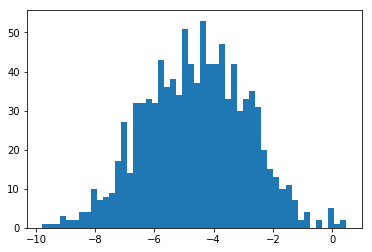

In [273]:
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
stat = get_bootstrap_sample(data2, 1000).mean(axis=1) - get_bootstrap_sample(data1, 1000).mean(axis=1)
plt.hist(stat, bins=50);

In [274]:
np.quantile(stat, [0.05/2, 1-0.05/2])

array([-8.06457589, -1.45040179])

In [246]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    np.random.seed(0)
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [250]:
permutation_test(data1, data2, max_permutations = 10000)

0.007